## Experimenting with CV Scores

``CVScores`` displays cross validation scores as a bar chart with the
  average of the scores as a horizontal line.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

In [28]:
import os

from yellowbrick.download import download_all

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "bikeshare": os.path.join(FIXTURES, "bikeshare", "bikeshare.csv"),
    "concrete": os.path.join(FIXTURES, "concrete", "concrete.csv"),
    "credit": os.path.join(FIXTURES, "credit", "credit.csv"),
    "energy": os.path.join(FIXTURES, "energy", "energy.csv"),
    "game": os.path.join(FIXTURES, "game", "game.csv"),
    "mushroom": os.path.join(FIXTURES, "mushroom", "mushroom.csv"),
    "occupancy": os.path.join(FIXTURES, "occupancy", "occupancy.csv"),
    "spam": os.path.join(FIXTURES, "spam", "spam.csv"),
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in dataset by name.
    If download is specified, this method will download any missing files.
    """

    # Get the path from the datasets
    path = datasets[name]

    # Check if the data exists, otherwise download or raise
    if not os.path.exists(path):
        if download:
            download_all()
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))


    # Return the data frame
    return pd.read_csv(path)

## Classification

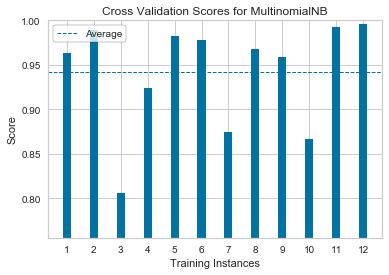

In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import StratifiedKFold

from yellowbrick.model_selection import CVScores

room = load_data("occupancy")

features = ["temperature", "relative humidity", "light", "C02", "humidity"]

# Extract the numpy arrays from the data frame
X = room[features].values
y = room.occupancy.values

# Create a new figure and axes
_, ax = plt.subplots()

# Create a cross-validation strategy
cv = StratifiedKFold(12)

# Create the cv score visualizer
oz = CVScores(
    MultinomialNB(), ax=ax, cv=cv, scoring='f1_weighted'
)

oz.fit(X, y)
oz.show()


## Regression

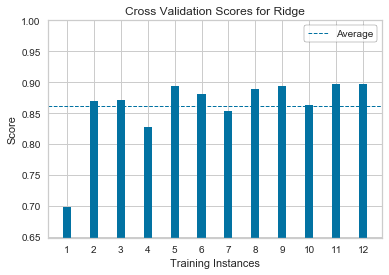

In [30]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold


energy = load_data("energy")

targets = ["heating load", "cooling load"]
features = [col for col in energy.columns if col not in targets]

X = energy[features]
y = energy[targets[1]]

# Create a new figure and axes
_, ax = plt.subplots()

cv = KFold(12)

oz = CVScores(
    Ridge(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.show()